In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12385, 6)
2020 (14921, 6)


In [19]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
13514,MA,INSUFICIENCIA_RESPIRATORIA,DOMICILIO,> 100,F,11
6781,TO,INDETERMINADA,DOMICILIO,50 - 59,M,1
5493,BA,INSUFICIENCIA_RESPIRATORIA,DOMICILIO,50 - 59,F,46
13828,RJ,OUTRAS,OUTROS_SERVICOS_SAUDE,> 100,M,14
8123,RS,COVID,OUTROS_SERVICOS_SAUDE,60 - 69,F,16


In [20]:
#Verificando quantos elementos uf temos na lista

len(dados_2019["uf"].unique())

27

In [21]:
#Verificando os tipos de doença

dados_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [22]:
#Vendo o total por doenca em 2019

dados_2019["tipo_doenca"].value_counts()

OUTRAS                        3847
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2324
SEPTICEMIA                    2065
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [23]:
#Vendo o total por doenca em 2020

dados_2020["tipo_doenca"].value_counts()

OUTRAS                        3801
INSUFICIENCIA_RESPIRATORIA    2334
PNEUMONIA                     2214
COVID                         2112
SEPTICEMIA                    2031
INDETERMINADA                 1347
SRAG                          1082
Name: tipo_doenca, dtype: int64

In [24]:
#Corrigindo o erro 2019

total_obitos_2019 = dados_2019.groupby("tipo_doenca").sum()
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6988
INSUFICIENCIA_RESPIRATORIA,100608
OUTRAS,660741
PNEUMONIA,226352
SEPTICEMIA,175533
SRAG,1498


In [25]:
#Corrigindo o erro

total_obitos_2020 = dados_2020.groupby("tipo_doenca").sum()
total_obitos_2020

,total
tipo_doenca,
COVID,195787
INDETERMINADA,9713
INSUFICIENCIA_RESPIRATORIA,98978
OUTRAS,690474
PNEUMONIA,182081
SEPTICEMIA,162866
SRAG,16563


In [26]:
proporcao = total_obitos_2020 / total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,195787.000000
INDETERMINADA,1.389954
INSUFICIENCIA_RESPIRATORIA,0.983799
OUTRAS,1.044999
PNEUMONIA,0.804415
SEPTICEMIA,0.927837
SRAG,11.056742


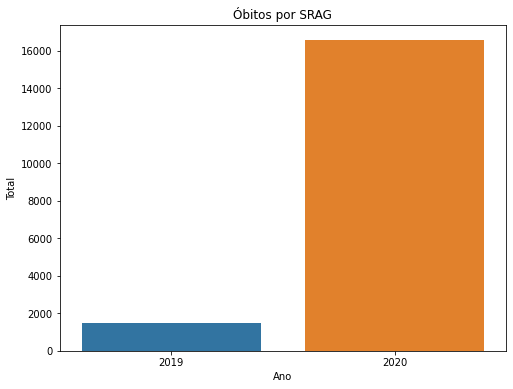

In [42]:
#Função para criar gráfico

def grafico_comparativo(causa):

    total_2019 = dados_2019.groupby("tipo_doenca").sum()
    total_2020 = dados_2020.groupby("tipo_doenca").sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    dados = pd.DataFrame({"Total": lista,
                          "Ano": [2019, 2020]})
    
    plt.figure(figsize=(8,6))
    sns.barplot(data = dados, x = "Ano", y = "Total")
    plt.title(f"Óbitos por {causa}")
    plt.show()

#Chamando a função para testar
grafico_comparativo("SRAG")

In [28]:
total_obitos_2019.loc["SRAG"]

total    1498
Name: SRAG, dtype: int64